In [114]:
import pandas as pd 
import numpy as np 
import plotly.express as px

In [115]:
df = pd.read_csv("data/housing_in_london_monthly_variables.csv", parse_dates= ['date'])

In [116]:
print(df.head())
print(df.info())

        date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london          91449  E09000001         17.0   
1 1995-02-01  city of london          82203  E09000001          7.0   
2 1995-03-01  city of london          79121  E09000001         14.0   
3 1995-04-01  city of london          77101  E09000001          7.0   
4 1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code         

In [117]:
df.describe()

,date,average_price,houses_sold,no_of_crimes,borough_flag
count,13549,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2007-06-30 22:12:58.507638784,2.635197e+05,3893.994129,2158.352063,0.733338
min,1995-01-01 00:00:00,4.072200e+04,2.000000,0.000000,0.000000
25%,2001-04-01 00:00:00,1.323800e+05,247.000000,1623.000000,0.000000
50%,2007-07-01 00:00:00,2.229190e+05,371.000000,2132.000000,1.000000
75%,2013-10-01 00:00:00,3.368430e+05,3146.000000,2582.000000,1.000000
max,2020-01-01 00:00:00,1.463378e+06,132163.000000,7461.000000,1.000000
std,NaN,1.876175e+05,12114.402476,902.087742,0.442230


In [118]:
# Column no_of_crimes has a lot of missing values. Better not use it.
print("Crimes Missing :", data['no_of_crimes'].isna().sum())

Crimes Missing : 6110


In [119]:
# Drop no_of_crimes column 
df_clean = df.drop(columns = ['no_of_crimes'])

In [121]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
corr_matrix

,average_price,houses_sold,no_of_crimes,borough_flag
average_price,1.000000,-0.168256,0.113835,0.293271
houses_sold,-0.168256,1.000000,0.246839,-0.489623
no_of_crimes,0.113835,0.246839,1.000000,NaN
borough_flag,0.293271,-0.489623,NaN,1.000000


In [122]:
#Average price is weakly correlated to borough_flag. 
#We need to separate data for each borough to see more correlation

<Axes: xlabel='date', ylabel='average_price'>

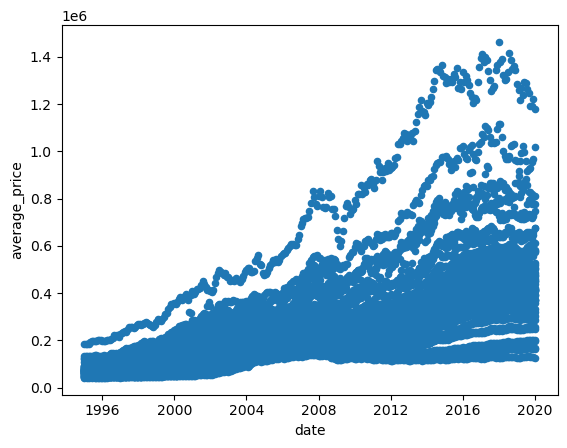

In [123]:
#Plots
df_clean.plot.scatter(x="date", y="average_price")

In [124]:
# There are patterns in data. It looks sliced. It seems that average price depends on the borough

In [125]:
# check number of boroughs in dataset
boroughs = df_clean[df['borough_flag'] == 1]['area'].unique()
print('Number of boroughs: %d' %(len(boroughs)))

Number of boroughs: 33


In [126]:
 # Look into mean average price houses in each area of borough
df_boroughs = df_clean[df['borough_flag'] == 1]
df_boroughs_mean = round(df_boroughs.groupby('area')['average_price'].mean(),2).sort_values().to_frame().reset_index()

# plotting the bar chart
fig = px.bar(df_boroughs_mean, x="average_price", y="area", template = 'simple_white', title ='Which borough area is the most expensive ?',
              width=800, height=1000 , orientation = 'h' )
fig.update_traces(opacity=0.75)
fig.show()

In [127]:
# Price changes in boroughs over time 
# Default display for top 5 most expensive boroughs 
boroughs_to_hide = np.delete(boroughs, [0,6,13,20,32])
fig = px.line(df_boroughs, x='date', y= 'average_price' , template = 'simple_white', title ='The change of house prices over 25 years (London boroughs)',
              width=1000, height=600 , color = 'area')
fig.for_each_trace(lambda trace: trace.update(visible="legendonly") 
                   if trace.name in boroughs_to_hide else ())
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [128]:
df.shape

(13549, 7)

Cross-validation results:
Mean Training R-squared: 0.9410649784060187
Mean Validation R-squared: -1.4443870877190303e+21
Mean Training RMSE: 0.16633741472663793
Mean Validation RMSE: 26309933732.539154
Mean Training MAE: 0.13457134294526057
Mean Validation MAE: 252758224.86211896


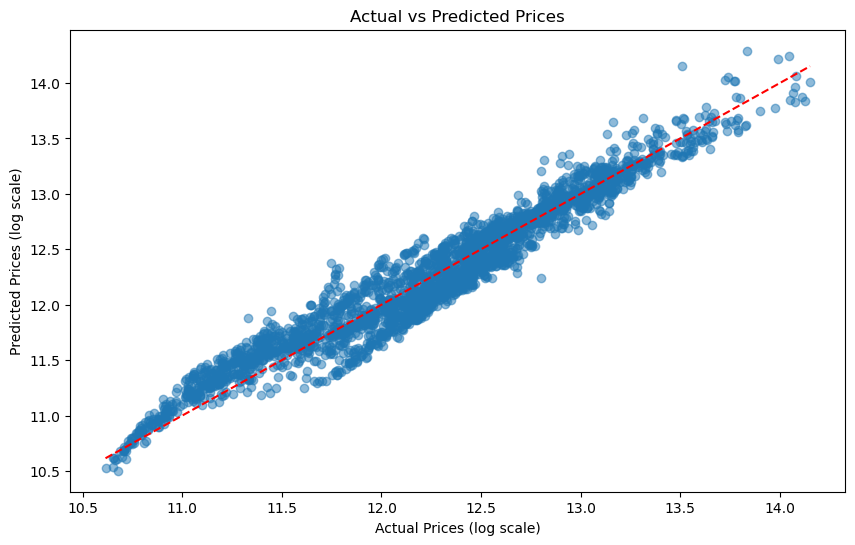

In [139]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
 
data = pd.read_csv('data/housing_in_london_monthly_variables.csv')
 
# Fill nulls with mean
imputer = SimpleImputer(strategy='mean')
numeric_data = data.select_dtypes(include=[np.number])
data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
 
# Add non-numeric columns after imputing
non_numeric_data = data.select_dtypes(exclude=[np.number])
data_imputed = pd.concat([data_imputed, non_numeric_data.reset_index(drop=True)], axis=1)
 
# Extract date parts
data_imputed['date'] = pd.to_datetime(data_imputed['date'])
data_imputed['year'] = data_imputed['date'].dt.year
data_imputed['month'] = data_imputed['date'].dt.month
data_imputed['quarter'] = data_imputed['date'].dt.quarter
 
# Drop date
data_imputed = data_imputed.drop(columns=['date'])
 
# Check if 'number_of_crimes' exists
if 'number_of_crimes' in data_imputed.columns:
    
    # Create interaction features ('houses_sold' * 'number_of_crimes')
    data_imputed['houses_sold_crimes_interaction'] = data_imputed['houses_sold'] * data_imputed['number_of_crimes']
 
    # Log features
    data_imputed['log_average_price'] = np.log1p(data_imputed['average_price'])
    data_imputed['log_houses_sold'] = np.log1p(data_imputed['houses_sold'])
    data_imputed['log_number_of_crimes'] = np.log1p(data_imputed['number_of_crimes'])
 
    # Drop the original features
    data_imputed = data_imputed.drop(columns=['average_price', 'houses_sold', 'number_of_crimes'])
else:
    # Transform to skewed features
    data_imputed['log_average_price'] = np.log1p(data_imputed['average_price'])
    data_imputed['log_houses_sold'] = np.log1p(data_imputed['houses_sold'])
 
    # Drop the original features 
    data_imputed = data_imputed.drop(columns=['average_price', 'houses_sold'])
 
# Convert categorical to numeric using one-hot encoding
if 'area' in data_imputed.columns and 'code' in data_imputed.columns:
    data_encoded = pd.get_dummies(data_imputed, columns=['area', 'code'], drop_first=True)
else:
    data_encoded = pd.get_dummies(data_imputed, drop_first=True)
 
# Define features and target
X = data_encoded.drop(columns=['log_average_price'])
y = data_encoded['log_average_price']
 
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Standardize numeric features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
 
# Train the model with cross-validation
model = LinearRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'), return_train_score=True)
 
# Evaluate model performance
print("Cross-validation results:")
print(f"Mean Training R-squared: {np.mean(cv_results['train_r2'])}")
print(f"Mean Validation R-squared: {np.mean(cv_results['test_r2'])}")
print(f"Mean Training RMSE: {np.sqrt(-np.mean(cv_results['train_neg_mean_squared_error']))}")
print(f"Mean Validation RMSE: {np.sqrt(-np.mean(cv_results['test_neg_mean_squared_error']))}")
print(f"Mean Training MAE: {-np.mean(cv_results['train_neg_mean_absolute_error'])}")
print(f"Mean Validation MAE: {-np.mean(cv_results['test_neg_mean_absolute_error'])}")
 
# Fit model on entire training data and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
# Final evaluation on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
#print(f'Test RMSE: {rmse}')
#print(f'Test MAE: {mae}')
#print(f'Test R-squared: {r2}')
 
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices (log scale)')
plt.ylabel('Predicted Prices (log scale)')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
# RMSE: On average, the model’s predictions are off by 0.17 which is small

# MAE: The average absolute error in the model’s predictions is 0.14 which is small

# R-squared: The model explains 0.94% of variance in the target variable

# MSE of 0.03 is small. There are small prediction errors